# Image processing starter kit

There are a number of [images](https://github.com/parrt/msan501/raw/master/projects/figures/project-images.zip) we will use in this project so please download and unzip them.  Make sure that you save the zip file in the repository for the class. The files are called: phobos2.jpg, obama.png, Veggies_noise.jpg, eye.png, guesswho.png, pcb.png, bonkers.png.  Make sure the files are in the same repo directory as your `images.ipynb` file (a copy of this notebook renamed).

## View

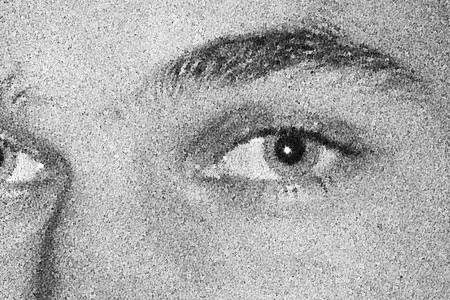

In [145]:
from PIL import Image

img = Image.open('eye.png')
img = img.convert("L") # grayscale
img   # same as display(img)

## Flip

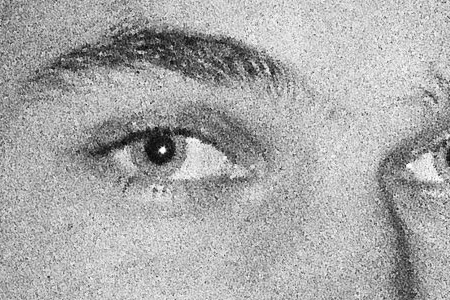

In [146]:
# define function flip()
def flip(img):
    width,height = img.size
    imgdup=img.copy()
    m1=img.load()
    m2=imgdup.load()
    for x in range(width):
        for y in range(height):
            m2[x,y]=m1[width-x-1,y]
    return imgdup
# open 'eye.png', convert to grayscale, flip, and display
img = Image.open('eye.png')
img = img.convert("L") 
flip(img) 

## Blur

In [147]:
# define getpixel, region3x3, avg, and blur functions
def getpixel(img,x,y):
    width,height=img.size
    if x<0:
        x=0
    if x>=width:
        x=width-1
    if y<0:
        y=0
    if y>=height:
        y=height-1
    m=img.load()
    return m[x,y]

def region3x3(img,x,y):
    me = getpixel(img,x,y)
    N = getpixel(img,x,y+1)
    NE = getpixel(img,x+1,y+1)
    E = getpixel(img,x+1,y)
    SE = getpixel(img,x+1,y-1)
    S = getpixel(img,x,y-1)
    SW = getpixel(img,x-1,y-1)
    W = getpixel(img,x-1,y)
    NW = getpixel(img,x-1,y+1)
    return me,N,NE,E,SE,S,SW,W,NW

def avg(data):
    return int(sum(data)/len(data))

def blur(img):
    width,height=img.size
    imgdup=img.copy()
    m=imgdup.load()    
    for x in range(width):
        for y in range(height):
            r = region3x3(img,x,y)
            m[x,y]=avg(r)
    return imgdup

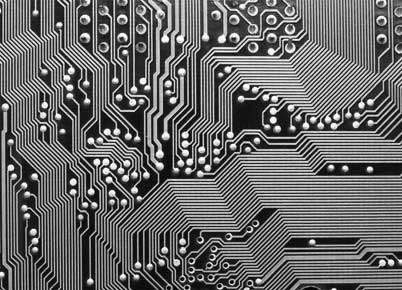

In [148]:
img = Image.open('pcb.png')
img = img.convert("L") # make greyscale if not already (luminance)
img

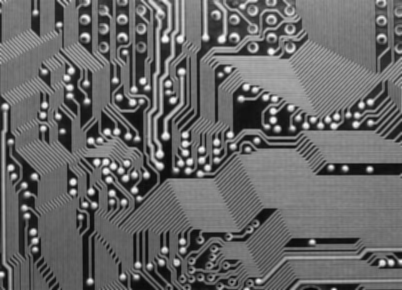

In [149]:
img = blur(img)
img

## Denoise

In [150]:
# define median and denoise functions
def median(data):
    index= len(data)//2-1+len(data)%2
    return  int(sorted(data)[index])

def denoise(img):
    width,height=img.size
    imgdup=img.copy()
    m=imgdup.load()    
    for x in range(width):
        for y in range(height):
            r = region3x3(img,x,y)
            m[x,y]=median(r)
    return imgdup

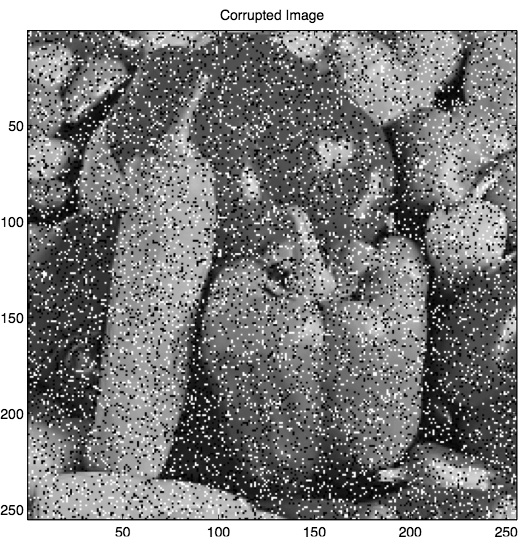

In [151]:
img = Image.open('Veggies_noise.jpg')
img = img.convert("L") # make greyscale if not already (luminance)
img

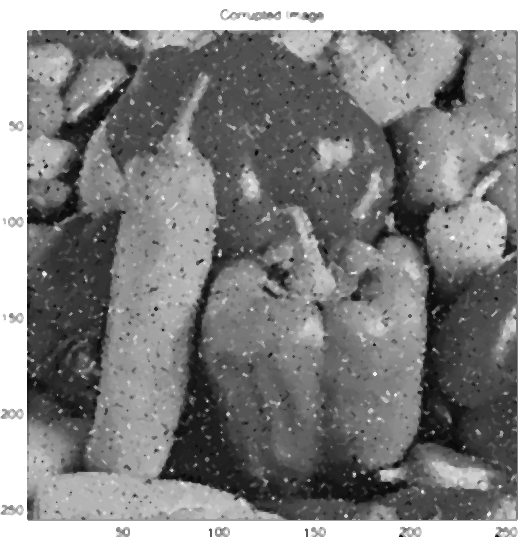

In [152]:
# denoise 3 times and display
img=denoise(denoise(denoise(img)))
img

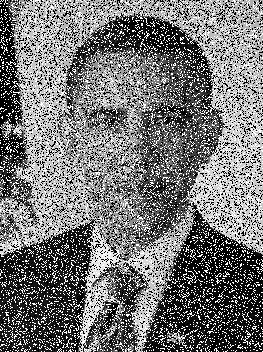

In [153]:
# show 'guesswho.png'
img = Image.open('guesswho.png')
img = img.convert("L") # make greyscale if not already (luminance)
img

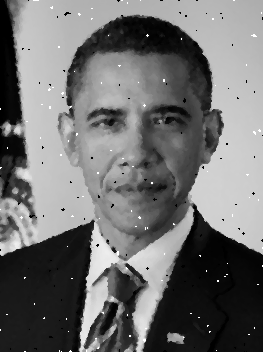

In [154]:
# denoise 3 times then display 
img=denoise(denoise(img))
img

## Generic filter

In [155]:
# define filter and open functions
def open(fname):
    img = Image.open(fname)
    img = img.convert("L")
    return img

def filter(img,f):
    width,height=img.size
    imgdup=img.copy()
    m=imgdup.load()    
    for x in range(width):
        for y in range(height):
            r = region3x3(img,x,y)
            m[x,y]=f(r)
    return imgdup

img = open('pcb.png')

### Blur refactored

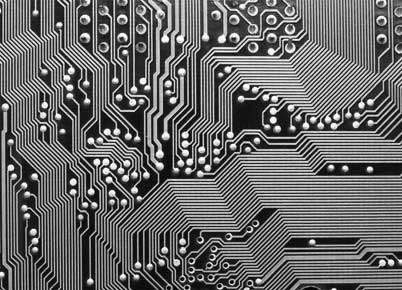

In [156]:
# Display 'pcb.png'
img

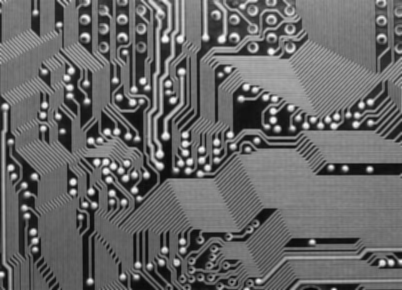

In [157]:
# use filter to blur the image
blurred = filter(img,avg)
blurred

### Denoise refactored

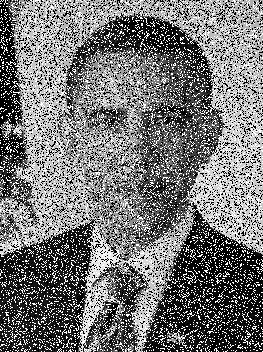

In [158]:
img = open('guesswho.png')
img

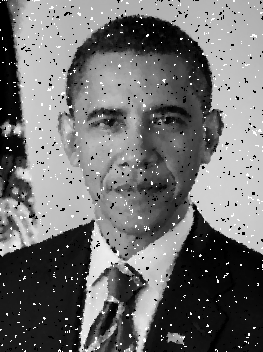

In [159]:
# using filter function, denoise the image
denoised = filter(img,median)
denoised

## Edges

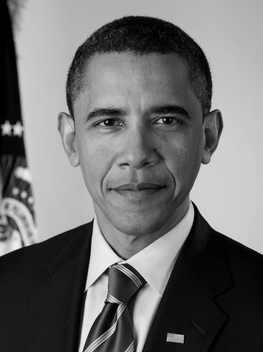

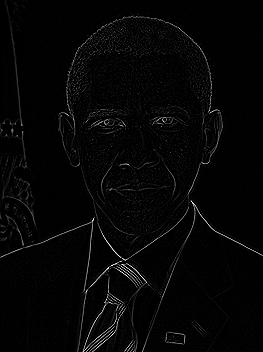

In [160]:
# define laplace function
def laplace(data):
    m=data[1]+data[3]+data[5]+data[7]-4*data[0]
    return m
# Open 'obama.png' and show the edges
img=open('obama.png')
display(img)
edges=filter(img,laplace)
edges

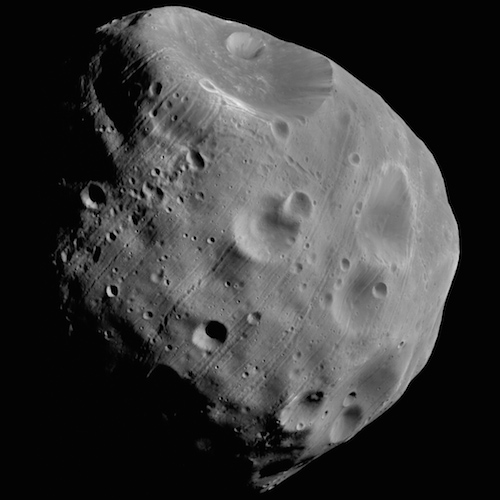

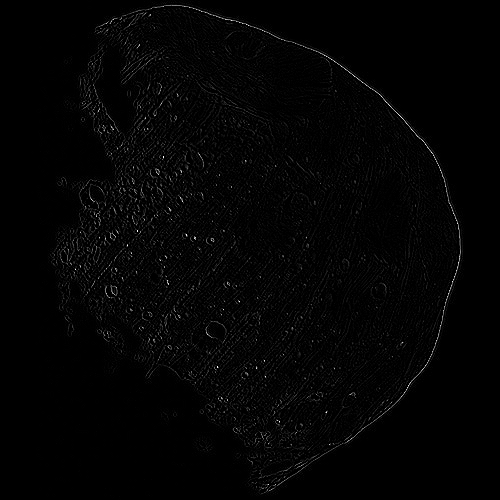

In [161]:
# Show the edges for 'phobos2.jpg
img=open('phobos2.jpg')
display(img)
edges=filter(img,laplace)
edges

## Sharpen

In [162]:
# define minus function
def minus(A,B):
    width,height=A.size
    A1=A.copy()
    m1=A.load()
    m2=B.load()
    m=A1.load()
    for x in range(width):
        for y in range(height):
            m[x,y]=m1[x,y]-m2[x,y]
    return A1

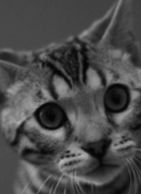

In [163]:
# display 'bonkers.png'
img=open('bonkers.png')
display(img)

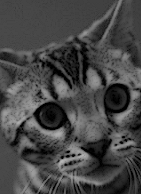

In [138]:
# sharpen that image and display it
edges=filter(img,laplace)
minus(img,edges)